In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding = 'latin1')

## Time Series Index

In [3]:
# Convert 'Date' to Datetime and set as index
df['Creation Date'] = pd.to_datetime(df['Creation Date'], dayfirst=True)
df.set_index('Creation Date',inplace = True)


In [4]:
df.index

DatetimeIndex(['2023-12-03', '2023-12-03', '2023-12-03', '2023-12-04',
               '2023-12-04', '2023-12-05', '2023-12-05', '2023-12-05',
               '2023-12-06', '2023-12-06',
               ...
               '2024-09-09', '2024-09-09', '2024-09-09', '2024-09-09',
               '2024-09-09', '2024-09-09', '2024-09-09', '2024-09-09',
               '2024-09-09', '2024-09-09'],
              dtype='datetime64[ns]', name='Creation Date', length=28623, freq=None)

In [5]:
df.loc['2025-1']['Revenue']


Creation Date
2025-01-01     39900
2025-01-01     39900
2025-01-01     39900
2025-01-01    478800
2025-01-01     39900
               ...  
2025-01-31     39900
2025-01-31     39900
2025-01-31     39900
2025-01-31     39900
2025-01-31     39900
Name: Revenue, Length: 2224, dtype: int64

In [6]:
df = df[df['Revenue'] != 0]
df = df.groupby(df.index).sum()

In [7]:
#Resampling to Monthly Frequancy and Calculate the mean closing price
df['Revenue'].resample('M').mean()

/tmp/ipykernel_41216/3542015835.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Revenue'].resample('M').mean()


Creation Date
2023-12-31    7.516393e+06
2024-01-31    1.600120e+07
2024-02-29    1.606188e+07
2024-03-31    1.570856e+07
2024-04-30    1.677202e+07
2024-05-31    1.685466e+07
2024-06-30    1.728508e+07
2024-07-31    1.723624e+07
2024-08-31    1.627605e+07
2024-09-30    1.697974e+07
2024-10-31    1.810537e+07
2024-11-30    1.599301e+07
2024-12-31    1.051991e+07
2025-01-31    3.818816e+06
Freq: ME, Name: Revenue, dtype: float64

## EDA

In [8]:
# Filter and make a copy to avoid SettingWithCopyWarning
df = df[df['Sales Method'] != 'Bundle'].copy()
df.loc['2025']['Sales Method'].unique()

array(['CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCode',
       'CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCode',
       'CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCode',
       'CodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCodeCod

<Axes: xlabel='Creation Date'>

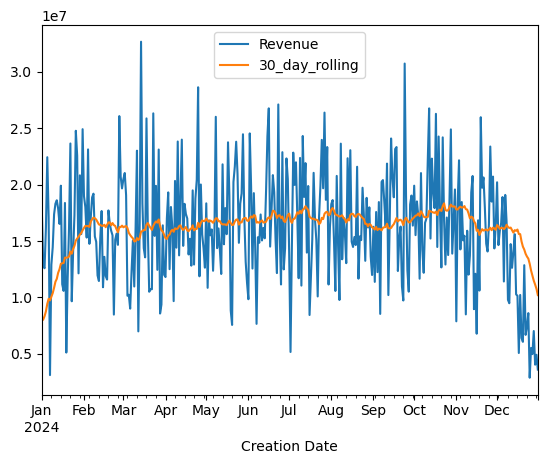

In [9]:
df = df[df['Revenue'] > 0] 
# Now safely calculate rolling average
df['30_day_rolling'] = df['Revenue'].rolling(window=30).mean()

# Plot for 2024
df[['Revenue', '30_day_rolling']].loc['2024'].plot()



In [10]:
# Extract Time Variables
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday
df['is_weekend'] = df.index.weekday > 4 # Check for weekend

df.head()

,Contract_ID,Gender,Age,Region,Managing Branch,Sales Unit,Selling branch,Sales Region,OrderID/RegCode,Transaction Code,...,Internet Package,Cancellation Date,Sales Method,30_day_rolling,year,month,day,weekday,weekday_numeric,is_weekend
Creation Date,,,,,,,,,,,,,,,,,,,,,
2023-12-03,SIM1000000952SIM1000003875SIM1000004226,0,109,04.Hai Phong06.Khanh Hoa10.Vung Tau,BTENBHBTN,OBBIBB,HBHDNISLA,13.Tay Nguyen - Mien Trung01.Ha Noi10.Vung Tau,SIMORDER952SIMORDER3875SIMORDER4226,0,...,Giga F1FTTH - Super500Sky,0,ExtraCodeCode,NaN,2023,12,3,Sunday,6,True
2023-12-04,SIM1000002839SIM1000003079,0,54,07.Ho Chi Minh06.Khanh Hoa,DLKHCM_03,OBBCBB,TGGHNI_02,02.Quang Ninh10.Vung Tau,SIMORDER2839SIMORDER3079,0,...,Meta F2FTTH - Super500,0,CodeCode,NaN,2023,12,4,Monday,0,False
2023-12-05,SIM1000001125SIM1000002091SIM1000004750,2,122,05.Da Nang05.Da Nang09.Binh Duong,CTOHCM_02HBH,IBBIBB,HPGHNI_05DKG,04.Hai Phong02.Quang Ninh08.Dong Nai,SIMORDER1125SIMORDER2091SIMORDER4750,0,...,Meta F2MetaGiga F1,0,CodeCodeCode,NaN,2023,12,5,Tuesday,1,False
2023-12-06,SIM1000000788SIM1000000842SIM1000001051SIM1000...,1,204,15.Tay Nam Bo03.Hai Duong14.Dong Nam Bo11.Tay ...,THAHYNHNI_03DKG,IBBCBBCBB,HNI_05HNI_02BTNBTN,12.Dong Bac Bo06.Khanh Hoa12.Dong Bac Bo10.Vun...,SIMORDER788SIMORDER842SIMORDER1051SIMORDER1774,0,...,SkyFTTH - Super500Giga - MultiFTTH - Super400,0,ExtraCodeCodeCode,NaN,2023,12,6,Wednesday,2,False
2023-12-08,SIM1000000782SIM1000001239SIM1000002650SIM1000...,4,183,09.Binh Duong04.Hai Phong14.Dong Nam Bo11.Tay ...,HCM_01HNMQTITNNPTO,OBBIBBIBB,VLGBTNLDGTBHHCM_06,14.Dong Nam Bo08.Dong Nai02.Quang Ninh03.Hai D...,SIMORDER782SIMORDER1239SIMORDER2650SIMORDER294...,0,...,Sky F3Sky F1FTTH - Super250Giga F1Sky F2,0,CodeCodeCodeExtraCode,NaN,2023,12,8,Friday,4,False


In [11]:
# Feature Enegineering - Lagged values
df['Revenue_lag1'] = df['Revenue'].shift(1)
df['Revenue_lag2'] = df['Revenue'].shift(2)

## Seasonal Decomposition

In [12]:
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
df['Revenue'].resample('M').mean()


/tmp/ipykernel_41216/1463569539.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Revenue'].resample('M').mean()


Creation Date
2023-12-31    7.516393e+06
2024-01-31    1.600120e+07
2024-02-29    1.606188e+07
2024-03-31    1.570856e+07
2024-04-30    1.677202e+07
2024-05-31    1.685466e+07
2024-06-30    1.728508e+07
2024-07-31    1.723624e+07
2024-08-31    1.627605e+07
2024-09-30    1.697974e+07
2024-10-31    1.810537e+07
2024-11-30    1.599301e+07
2024-12-31    1.051991e+07
2025-01-31    3.818816e+06
Freq: ME, Name: Revenue, dtype: float64

/tmp/ipykernel_41216/2711891604.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['Revenue'].resample('M').mean())


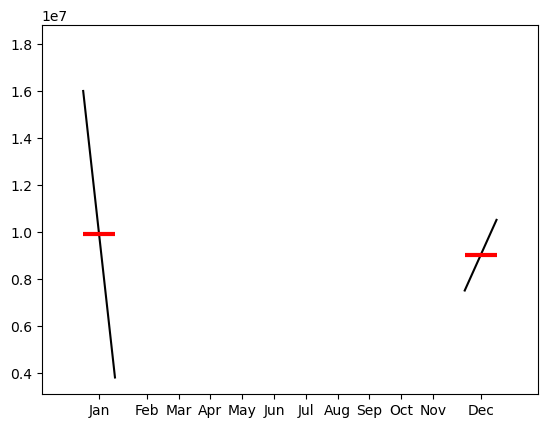

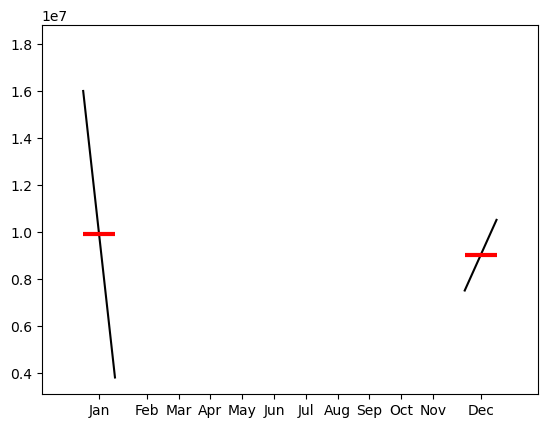

In [14]:
month_plot(df['Revenue'].resample('M').mean())

Due to the limited data range from December 2023 to January 2025, there is not enough information to identify or analyze seasonal patterns across months

<Axes: xlabel='Creation Date'>

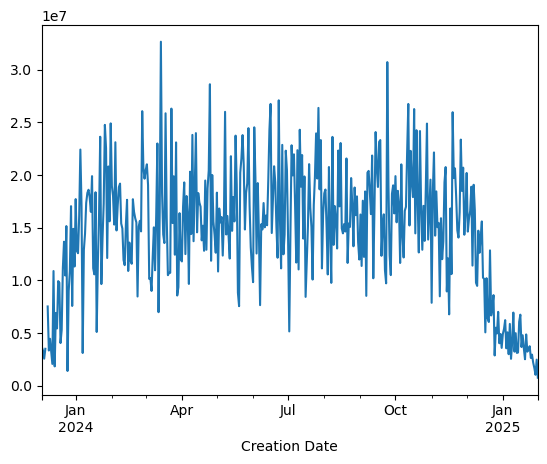

In [15]:
df['Revenue'].resample('D').mean().plot()


In [16]:
df.isnull().sum()


Contract_ID            0
Gender                 0
Age                    0
Region                 0
Managing Branch        0
Sales Unit             0
Selling branch         0
Sales Region           0
OrderID/RegCode        0
Transaction Code       0
Type                   0
FG Package Command     0
Payment Month          0
Revenue                0
Sales Channel          0
Status FGame           0
Active Date            0
Service Start Date     0
Service End Date       0
Internet Package       0
Cancellation Date      0
Sales Method           0
30_day_rolling        29
year                   0
month                  0
day                    0
weekday                0
weekday_numeric        0
is_weekend             0
Revenue_lag1           1
Revenue_lag2           2
dtype: int64

In [17]:
df['Revenue'] = df['Revenue'].replace(0, np.nan)
df['Revenue'] = df['Revenue'].interpolate()


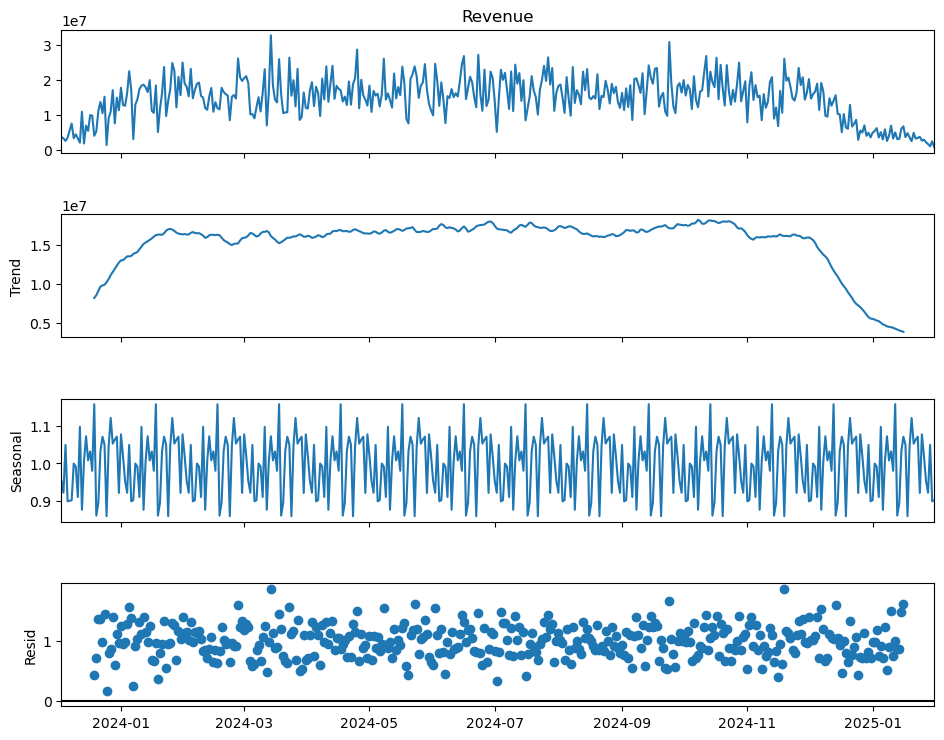

In [18]:
decomposition = seasonal_decompose(df['Revenue'], model='multiplicative', period=30)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()


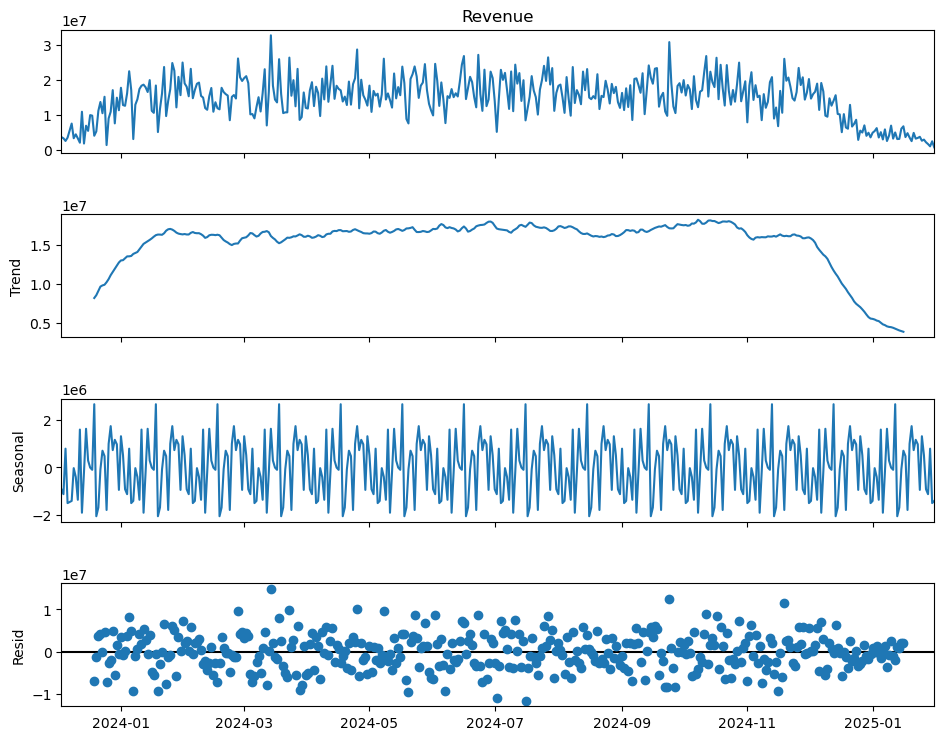

In [19]:
decomposition = seasonal_decompose(df['Revenue'], model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()


Multiplicative fits better:
- Cleaner seasonal pattern in the top figure (values around 1, not wildly swinging).
- Smaller residuals (closer to 1) → means the model explained more of the variation.
- Additive model's residuals are larger, showing it didn't explain the data as well.

## Auto Correlation (ACF)

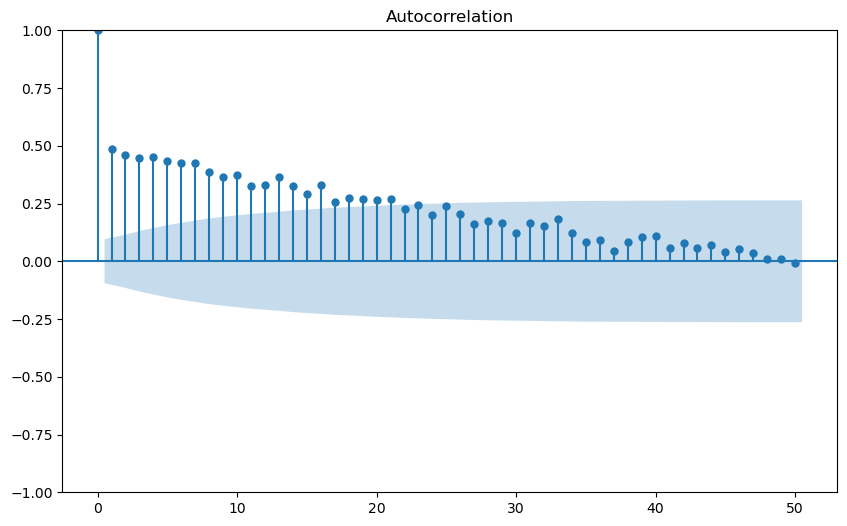

In [20]:
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['Revenue'], lags = 50 ,ax = ax)
plt.show()

## Forecasting - Prophet

In [8]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and clean
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding='latin1')
df['Creation Date'] = pd.to_datetime(df['Creation Date'], dayfirst=True)
df = df[df['Revenue'] > 0]
df = df.groupby('Creation Date')['Revenue'].sum().reset_index()
df.columns = ['ds', 'y']

# Split
train = df[df['ds'] < '2024-11-01']
test  = df[(df['ds'] >= '2024-11-01') & (df['ds'] <= '2025-01-31')]


holidays = pd.DataFrame({
  'holiday': 'year_end',
  'ds': pd.to_datetime(['2024-12-24', '2024-12-31', '2025-01-01']),
  'lower_window': 0,
  'upper_window': 2,
})

model = Prophet(
    holidays=holidays,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)

model.fit(train)

future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)

22:54:55 - cmdstanpy - INFO - Chain [1] start processing
22:54:55 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
# Merge forecast with test set
forecast_eval = forecast[['ds', 'yhat']].merge(test, on='ds')

# Evaluation
mae = mean_absolute_error(forecast_eval['y'], forecast_eval['yhat'])
rmse = mean_squared_error(forecast_eval['y'], forecast_eval['yhat'], squared=False)
mape = (abs((forecast_eval['y'] - forecast_eval['yhat']) / forecast_eval['y'])).mean() * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 15897349.11
RMSE: 19249938.09
MAPE: 427.29%


/home/shadowfiend/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


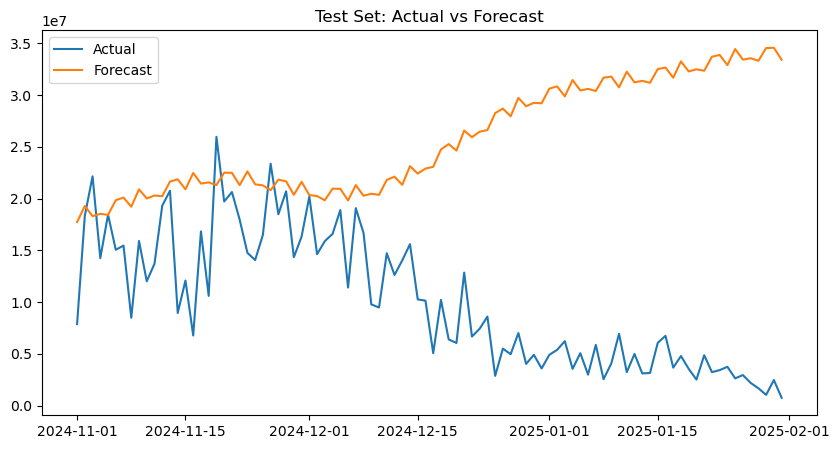

In [10]:
plt.figure(figsize=(10,5))
plt.plot(test['ds'], test['y'], label='Actual')
plt.plot(forecast_eval['ds'], forecast_eval['yhat'], label='Forecast')
plt.title("Test Set: Actual vs Forecast")
plt.legend()
plt.show()


22:55:05 - cmdstanpy - INFO - Chain [1] start processing
22:55:05 - cmdstanpy - INFO - Chain [1] done processing
/home/shadowfiend/anaconda3/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/shadowfiend/anaconda3/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


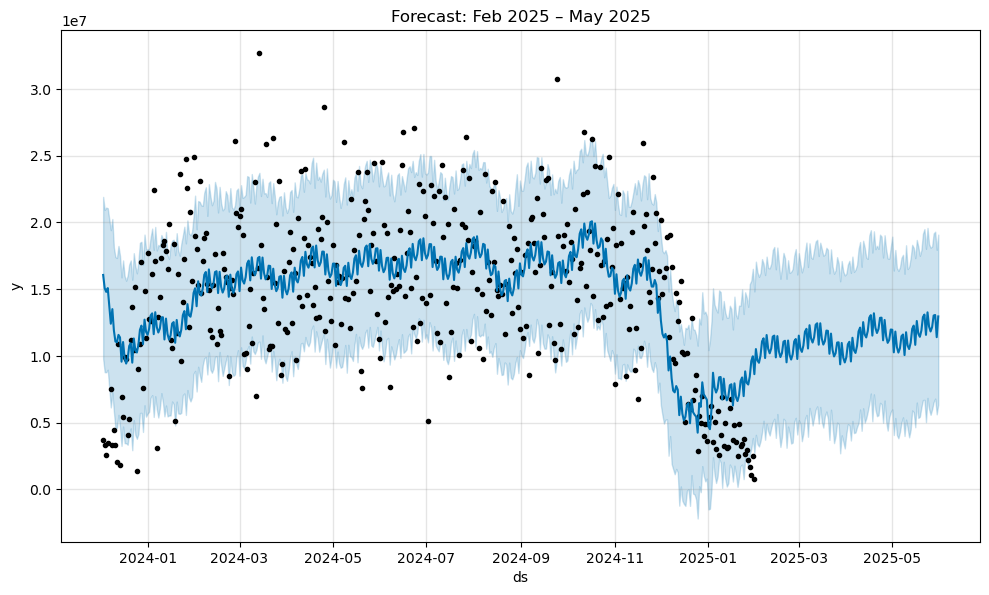

In [11]:
# Retrain full model
model_final = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=True)
model_final.fit(df)

# Forecast Feb 2025 to May 2025
future_final = model_final.make_future_dataframe(periods=120, freq='D')
forecast_final = model_final.predict(future_final)

fig = model_final.plot(forecast_final)
plt.title("Forecast: Feb 2025 – May 2025")
plt.show()


In [18]:
# Predict on entire training set (fitted period)
fitted = model_final.predict(df[['ds']])

# Merge actual and predicted
fitted_eval = df[['ds', 'y']].merge(fitted[['ds', 'yhat']], on='ds')

# Evaluate fit quality
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(fitted_eval['y'], fitted_eval['yhat'])
rmse = mean_squared_error(fitted_eval['y'], fitted_eval['yhat'], squared=False)
mape = (abs((fitted_eval['y'] - fitted_eval['yhat']) / fitted_eval['y'])).mean() * 100

print("=== Fit Evaluation (on training data) ===")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")


=== Fit Evaluation (on training data) ===
MAE  : 3891460.80
RMSE : 4872365.68
MAPE : 46.00%


/home/shadowfiend/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Forecasting - LSTM

In [24]:
import pandas as pd
import torch
from torch import nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np


In [25]:
# --------------------------
# Step 1: Load and preprocess data
# --------------------------
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding='latin1')
df["Creation Date"] = pd.to_datetime(df["Creation Date"], dayfirst=True)
df = df[df["Revenue"] > 0]
df = df.groupby("Creation Date")["Revenue"].sum().reset_index()
df = df.sort_values("Creation Date")

# Normalize revenue
scaler = StandardScaler()
df["Revenue_scaled"] = scaler.fit_transform(df[["Revenue"]])

# --------------------------
# Step 2: Create sliding window dataset
# --------------------------
class RevenueDataset(Dataset):
    def __init__(self, series, input_len=30, pred_len=7):
        self.X = []
        self.y = []
        for i in range(len(series) - input_len - pred_len):
            self.X.append(series[i:i+input_len])
            self.y.append(series[i+input_len:i+input_len+pred_len])
        self.X = torch.tensor(self.X, dtype=torch.float32).unsqueeze(-1)  # (N, T, 1)
        self.y = torch.tensor(self.y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

data_series = df["Revenue_scaled"].values
dataset = RevenueDataset(data_series, input_len=30, pred_len=7)

train_size = int(0.8 * len(dataset))
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# --------------------------
# Step 3: Define LSTM model
# --------------------------
class LSTMForecast(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_len=7):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_len)

    def forward(self, x):
        out, _ = self.lstm(x)         # out: [B, T, H]
        out = out[:, -1, :]           # Take last output
        out = self.linear(out)        # Predict next values
        return out

model = LSTMForecast()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# --------------------------
# Step 4: Train the model
# --------------------------
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

epochs = 30
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {total_loss/len(train_loader):.4f}")

# --------------------------
# Step 5: Evaluate and visualize
# --------------------------
model.eval()
X_sample, y_true = next(iter(val_loader))
X_sample = X_sample.to(device)
with torch.no_grad():
    y_pred = model(X_sample).cpu().numpy()

# Inverse scale to original revenue
y_pred_orig = scaler.inverse_transform(y_pred)
y_true_orig = scaler.inverse_transform(y_true.numpy())



/tmp/ipykernel_41216/1639758159.py:24: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647175880/work/torch/csrc/utils/tensor_new.cpp:278.)
  self.X = torch.tensor(self.X, dtype=torch.float32).unsqueeze(-1)  # (N, T, 1)


Epoch 1/30 - Train Loss: 0.8829
Epoch 2/30 - Train Loss: 0.8437
Epoch 3/30 - Train Loss: 0.7100
Epoch 4/30 - Train Loss: 0.6365
Epoch 5/30 - Train Loss: 0.6099
Epoch 6/30 - Train Loss: 0.5868
Epoch 7/30 - Train Loss: 0.5784
Epoch 8/30 - Train Loss: 0.5789
Epoch 9/30 - Train Loss: 0.5715
Epoch 10/30 - Train Loss: 0.5702
Epoch 11/30 - Train Loss: 0.5687
Epoch 12/30 - Train Loss: 0.5661
Epoch 13/30 - Train Loss: 0.5666
Epoch 14/30 - Train Loss: 0.5610
Epoch 15/30 - Train Loss: 0.5601
Epoch 16/30 - Train Loss: 0.5635
Epoch 17/30 - Train Loss: 0.5605
Epoch 18/30 - Train Loss: 0.5596
Epoch 19/30 - Train Loss: 0.5593
Epoch 20/30 - Train Loss: 0.5531
Epoch 21/30 - Train Loss: 0.5539
Epoch 22/30 - Train Loss: 0.5544
Epoch 23/30 - Train Loss: 0.5536
Epoch 24/30 - Train Loss: 0.5503
Epoch 25/30 - Train Loss: 0.5507
Epoch 26/30 - Train Loss: 0.5422
Epoch 27/30 - Train Loss: 0.5328
Epoch 28/30 - Train Loss: 0.5301
Epoch 29/30 - Train Loss: 0.5292
Epoch 30/30 - Train Loss: 0.5233


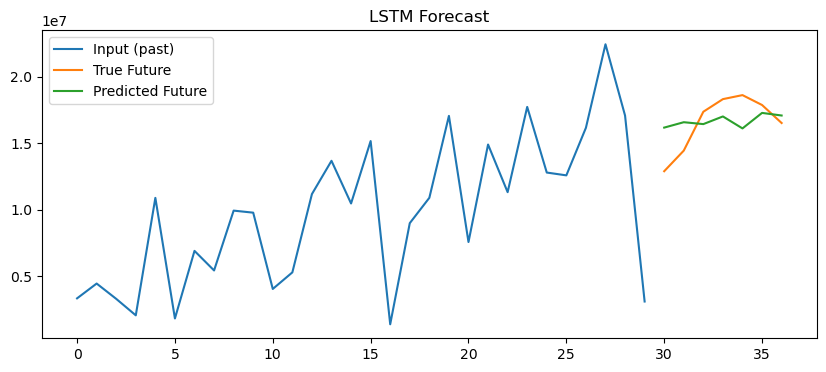

In [26]:
# Plot first sample
plt.figure(figsize=(10, 4))
plt.plot(range(30), scaler.inverse_transform(X_sample[0].cpu().numpy()).flatten(), label="Input (past)")
plt.plot(range(30, 37), y_true_orig[0], label="True Future")
plt.plot(range(30, 37), y_pred_orig[0], label="Predicted Future")
plt.title("LSTM Forecast")
plt.legend()
plt.show()

In [27]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Avoid divide-by-zero
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-8))) * 100

# Flatten to compare all values across all batches
y_pred_all = y_pred_orig.flatten()
y_true_all = y_true_orig.flatten()

# MAE
mae = mean_absolute_error(y_true_all, y_pred_all)

# RMSE
rmse = np.sqrt(mean_squared_error(y_true_all, y_pred_all))

# MAPE
mape = mean_absolute_percentage_error(y_true_all, y_pred_all)

# Show results
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE:  3644062.25
RMSE: 4663694.50
MAPE: 27.62%


/tmp/ipykernel_10504/1955403029.py:36: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647175880/work/torch/csrc/utils/tensor_new.cpp:278.)
  self.X = torch.tensor(self.X, dtype=torch.float32).unsqueeze(-1)  # (N, T, 1)


Epoch 1/30 - Train Loss: 0.6781
Epoch 2/30 - Train Loss: 0.6155
Epoch 3/30 - Train Loss: 0.6142
Epoch 4/30 - Train Loss: 0.6068
Epoch 5/30 - Train Loss: 0.6050
Epoch 6/30 - Train Loss: 0.6077
Epoch 7/30 - Train Loss: 0.5993
Epoch 8/30 - Train Loss: 0.6013
Epoch 9/30 - Train Loss: 0.6028
Epoch 10/30 - Train Loss: 0.6021
Epoch 11/30 - Train Loss: 0.6092
Epoch 12/30 - Train Loss: 0.6037
Epoch 13/30 - Train Loss: 0.5989
Epoch 14/30 - Train Loss: 0.6059
Epoch 15/30 - Train Loss: 0.6000
Epoch 16/30 - Train Loss: 0.5966
Epoch 17/30 - Train Loss: 0.5956
Epoch 18/30 - Train Loss: 0.5979
Epoch 19/30 - Train Loss: 0.6017
Epoch 20/30 - Train Loss: 0.6030
Epoch 21/30 - Train Loss: 0.6047
Epoch 22/30 - Train Loss: 0.5993
Epoch 23/30 - Train Loss: 0.5956
Epoch 24/30 - Train Loss: 0.5972
Epoch 25/30 - Train Loss: 0.6037
Epoch 26/30 - Train Loss: 0.5955
Epoch 27/30 - Train Loss: 0.5876
Epoch 28/30 - Train Loss: 0.5941
Epoch 29/30 - Train Loss: 0.5953
Epoch 30/30 - Train Loss: 0.5916


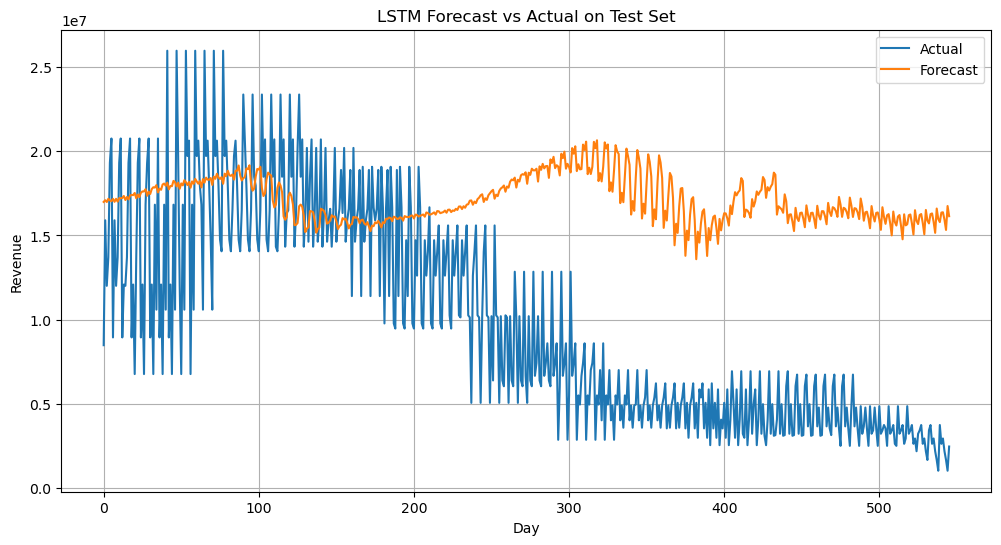

MAE: 8307078.00
RMSE: 9625108.00


/home/shadowfiend/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --------------------------
# Step 1: Load and preprocess data
# --------------------------
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding='latin1')
df["Creation Date"] = pd.to_datetime(df["Creation Date"], dayfirst=True)
df = df[df["Revenue"] > 0]
df = df.groupby("Creation Date")["Revenue"].sum().reset_index()
df = df.sort_values("Creation Date")

# Normalize revenue
scaler = StandardScaler()
df["Revenue_scaled"] = scaler.fit_transform(df[["Revenue"]])

# Create time series
data_series = df["Revenue_scaled"].values

# --------------------------
# Step 2: Create Dataset Class with Sliding Window
# --------------------------
class RevenueDataset(Dataset):
    def __init__(self, series, input_len=30, pred_len=7):
        self.X = []
        self.y = []
        for i in range(len(series) - input_len - pred_len):
            self.X.append(series[i:i+input_len])
            self.y.append(series[i+input_len:i+input_len+pred_len])
        self.X = torch.tensor(self.X, dtype=torch.float32).unsqueeze(-1)  # (N, T, 1)
        self.y = torch.tensor(self.y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# --------------------------
# Step 3: Split into Train and Test based on time
# --------------------------
split_idx = int(len(data_series) * 0.8)
train_series = data_series[:split_idx]
test_series = data_series[split_idx - 30:]  # need overlap

train_dataset = RevenueDataset(train_series, input_len=30, pred_len=7)
test_dataset = RevenueDataset(test_series, input_len=30, pred_len=7)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# --------------------------
# Step 4: Define LSTM model
# --------------------------
class LSTMForecast(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_len=7):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_len)

    def forward(self, x):
        out, _ = self.lstm(x)         # out: [B, T, H]
        out = out[:, -1, :]           # Take last output
        out = self.linear(out)        # Predict next values
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMForecast().to(device)

# --------------------------
# Step 5: Train the model
# --------------------------
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

epochs = 30
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {total_loss/len(train_loader):.4f}")

# --------------------------
# Step 6: Evaluate on Test Set
# --------------------------
model.eval()
predictions = []
targets = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        pred = model(X_batch).cpu().numpy()
        true = y_batch.numpy()

        predictions.append(pred[0])
        targets.append(true[0])

predictions = np.array(predictions)
targets = np.array(targets)

# Flatten and inverse scale
y_pred_flat = scaler.inverse_transform(predictions.flatten().reshape(-1, 1)).flatten()
y_true_flat = scaler.inverse_transform(targets.flatten().reshape(-1, 1)).flatten()

# --------------------------
# Step 7: Visualize
# --------------------------
plt.figure(figsize=(12,6))
plt.plot(y_true_flat, label='Actual')
plt.plot(y_pred_flat, label='Forecast')
plt.title('LSTM Forecast vs Actual on Test Set')
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()

# --------------------------
# Step 8: Evaluate Metrics
# --------------------------
mae = mean_absolute_error(y_true_flat, y_pred_flat)
rmse = mean_squared_error(y_true_flat, y_pred_flat, squared=False)
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


## Combined between LSTM and Prophet

In [14]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Load and process your revenue data
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding = 'latin1')
df["Creation Date"] = pd.to_datetime(df["Creation Date"], dayfirst=True)
df = df[df["Revenue"] > 0]
df = df.groupby("Creation Date")["Revenue"].sum().reset_index()
df.columns = ['ds', 'y']

# Define holidays (optional)
holidays = pd.DataFrame({
  'holiday': 'year_end',
  'ds': pd.to_datetime(['2024-12-24', '2024-12-31', '2025-01-01']),
  'lower_window': 0,
  'upper_window': 2,
})

# Fit Prophet
prophet_model = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=True)
prophet_model.fit(df)

# Forecast on historical data to get residuals
forecast = prophet_model.predict(df[['ds']])
df['yhat'] = forecast['yhat']
df['residual'] = df['y'] - df['yhat']


08:22:14 - cmdstanpy - INFO - Chain [1] start processing
08:22:14 - cmdstanpy - INFO - Chain [1] done processing


Epoch 1: Loss 0.9252
Epoch 2: Loss 0.9169
Epoch 3: Loss 0.9123
Epoch 4: Loss 0.9041
Epoch 5: Loss 0.9051
Epoch 6: Loss 0.8973
Epoch 7: Loss 0.8896
Epoch 8: Loss 0.8888
Epoch 9: Loss 0.8868
Epoch 10: Loss 0.8889
Epoch 11: Loss 0.8865
Epoch 12: Loss 0.8822
Epoch 13: Loss 0.8736
Epoch 14: Loss 0.8695
Epoch 15: Loss 0.8588
Epoch 16: Loss 0.8541
Epoch 17: Loss 0.8518
Epoch 18: Loss 0.8437
Epoch 19: Loss 0.8468
Epoch 20: Loss 0.8472
Epoch 21: Loss 0.8469
Epoch 22: Loss 0.8387
Epoch 23: Loss 0.8351
Epoch 24: Loss 0.8375
Epoch 25: Loss 0.8355
Epoch 26: Loss 0.8371
Epoch 27: Loss 0.8372
Epoch 28: Loss 0.8383
Epoch 29: Loss 0.8354
Epoch 30: Loss 0.8314
          ds  Prophet Forecast  LSTM Residual Forecast  Final Hybrid Forecast
0 2025-02-01      1.050831e+07            68469.585938           1.057678e+07
1 2025-02-02      9.646756e+06           335789.687500           9.982545e+06
2 2025-02-03      9.480590e+06           151788.703125           9.632379e+06
3 2025-02-04      1.001400e+07       

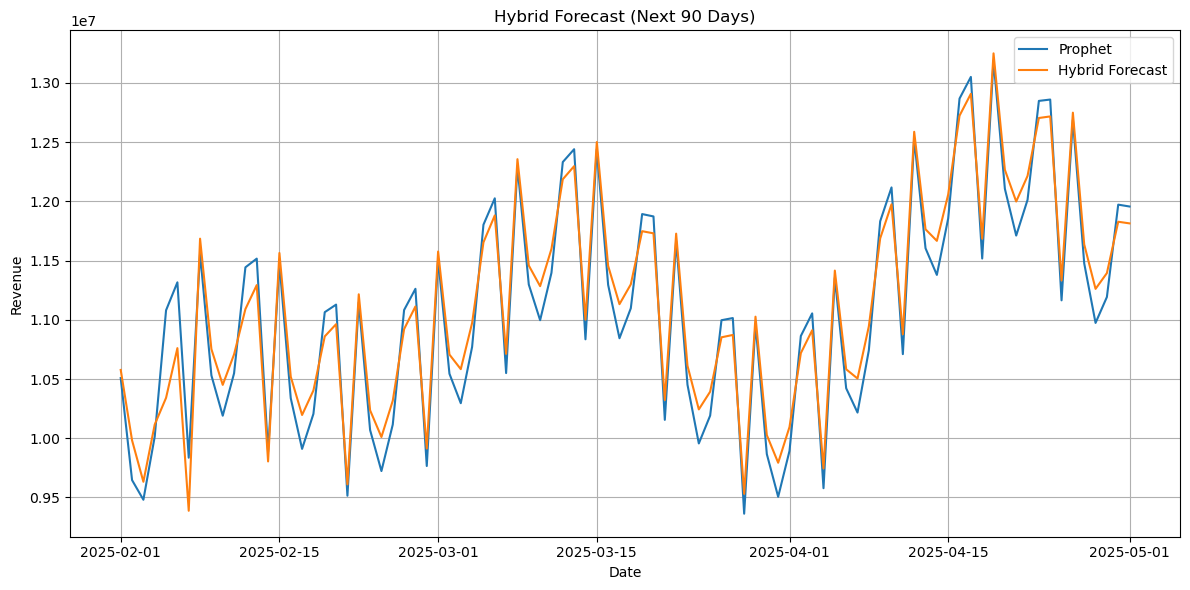

In [15]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Scale residuals
scaler = StandardScaler()
residual_scaled = scaler.fit_transform(df["residual"].fillna(0).values.reshape(-1, 1)).flatten()

# Step 2: Custom Dataset for LSTM
class ResidualDataset(Dataset):
    def __init__(self, series, input_len=30, pred_len=7):
        self.X, self.y = [], []
        for i in range(len(series) - input_len - pred_len):
            self.X.append(series[i:i+input_len])
            self.y.append(series[i+input_len:i+input_len+pred_len])
        self.X = torch.tensor(self.X, dtype=torch.float32).unsqueeze(-1)
        self.y = torch.tensor(self.y, dtype=torch.float32)

    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

# Step 3: DataLoader setup
dataset = ResidualDataset(residual_scaled)
train_size = int(0.8 * len(dataset))
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, len(dataset) - train_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Step 4: Define LSTM model
class LSTMForecast(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_len=7):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_len)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]
        return self.linear(out)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_lstm = LSTMForecast().to(device)

# Step 5: Train LSTM
optimizer = torch.optim.Adam(model_lstm.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

for epoch in range(30):
    model_lstm.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        pred = model_lstm(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss {total_loss/len(train_loader):.4f}")

# Step 6: Prophet forecast for next 90 days
future = prophet_model.make_future_dataframe(periods=90)
forecast_future = prophet_model.predict(future)
yhat_future = forecast_future[['ds', 'yhat']].tail(90).yhat.values

# Step 7: Generate 90 residuals with LSTM (looped)
input_seq = residual_scaled[-30:].tolist()
pred_residual_all = []

model_lstm.eval()
with torch.no_grad():
    for _ in range(13):  # 13 * 7 = 91
        input_tensor = torch.tensor(input_seq[-30:], dtype=torch.float32).unsqueeze(0).unsqueeze(-1).to(device)
        pred = model_lstm(input_tensor).cpu().numpy().flatten()
        pred_residual_all.extend(pred)
        input_seq.extend(pred)

# Cut to exactly 90 residuals
pred_residual_all = pred_residual_all[:90]
pred_residual_all = scaler.inverse_transform(np.array(pred_residual_all).reshape(-1, 1)).flatten()

# Step 8: Combine forecasts
final_forecast = yhat_future + pred_residual_all
forecast_dates = forecast_future[['ds']].tail(90).ds.values

# Step 9: Display forecast
hybrid_df = pd.DataFrame({
    'ds': forecast_dates,
    'Prophet Forecast': yhat_future,
    'LSTM Residual Forecast': pred_residual_all,
    'Final Hybrid Forecast': final_forecast
})

print(hybrid_df.head())

plt.figure(figsize=(12, 6))
plt.plot(hybrid_df['ds'], hybrid_df['Prophet Forecast'], label='Prophet')
plt.plot(hybrid_df['ds'], hybrid_df['Final Hybrid Forecast'], label='Hybrid Forecast')
plt.legend()
plt.title("Hybrid Forecast (Next 90 Days)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Get last 90 days of actuals and predictions from your training set
eval_days = 90
actuals = df['y'].values[-eval_days:]
prophet_pred = df['yhat'].values[-eval_days:]
residuals = df['residual'].values[-eval_days:]

# Use the trained LSTM to generate predicted residuals for these 90 days
# (Rebuild input from earlier residuals)
residual_scaled_eval = scaler.transform(residuals.reshape(-1, 1)).flatten()
input_seq = residual_scaled[-(30+eval_days):].tolist()  # enough padding

pred_residual_eval = []
model_lstm.eval()
with torch.no_grad():
    for i in range(0, eval_days, 7):
        input_tensor = torch.tensor(input_seq[i:i+30], dtype=torch.float32).unsqueeze(0).unsqueeze(-1).to(device)
        pred = model_lstm(input_tensor).cpu().numpy().flatten()
        pred_residual_eval.extend(pred)

# Trim to match 90-day length
pred_residual_eval = pred_residual_eval[:eval_days]
pred_residual_eval = scaler.inverse_transform(np.array(pred_residual_eval).reshape(-1, 1)).flatten()

# Final hybrid forecast on historical data
hybrid_eval = prophet_pred + pred_residual_eval

# Metrics
mae = mean_absolute_error(actuals, hybrid_eval)
rmse = np.sqrt(mean_squared_error(actuals, hybrid_eval))
mape = np.mean(np.abs((actuals - hybrid_eval) / actuals)) * 100

print(f"Evaluation on last {eval_days} days:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


Evaluation on last 90 days:
MAE: 3258660.89
RMSE: 4052845.36
MAPE: 72.89%


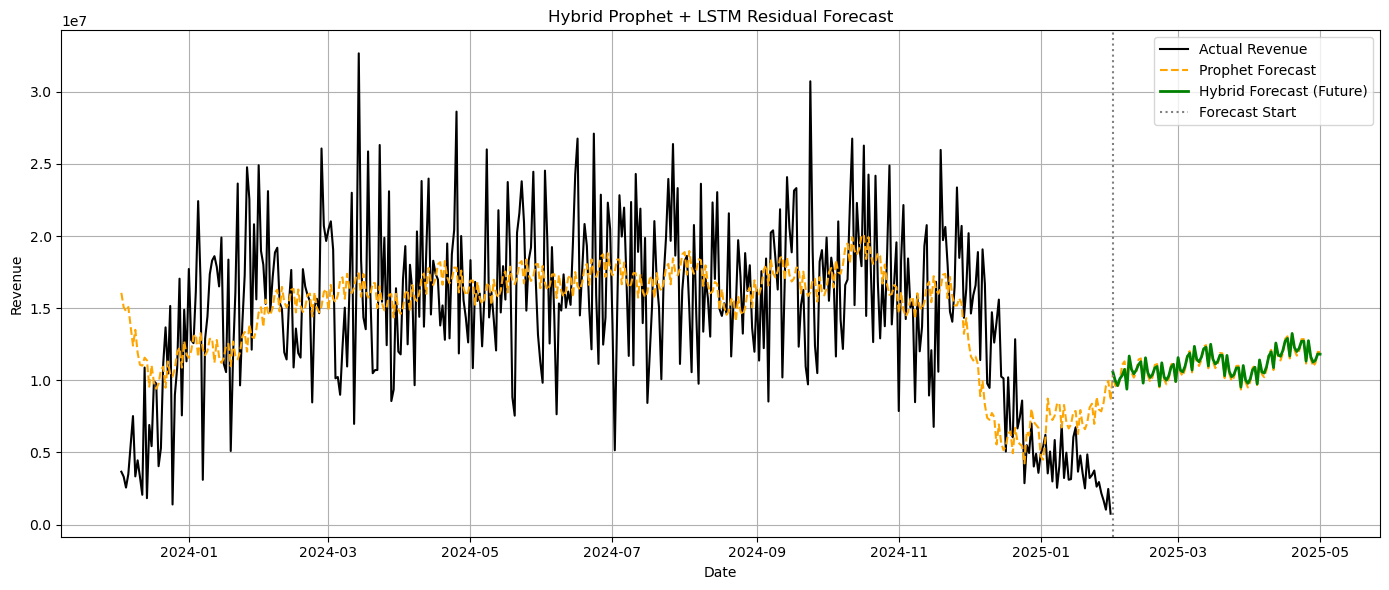

In [17]:
# Step 10: Merge with original df for full view
merged_df = pd.merge(forecast_future[['ds', 'yhat']], df[['ds', 'y']], on='ds', how='left')

# Append hybrid forecast to merged_df for plotting
hybrid_df_full = pd.DataFrame({
    'ds': forecast_dates,
    'hybrid': final_forecast
})
merged_df = pd.merge(merged_df, hybrid_df_full, on='ds', how='left')

# Step 11: Plot full timeline
plt.figure(figsize=(14, 6))

# Historical actuals
plt.plot(merged_df['ds'], merged_df['y'], label='Actual Revenue', color='black')

# Prophet forecast (fit + future)
plt.plot(merged_df['ds'], merged_df['yhat'], label='Prophet Forecast', color='orange', linestyle='--')

# Hybrid forecast (future only)
plt.plot(hybrid_df['ds'], hybrid_df['Final Hybrid Forecast'], label='Hybrid Forecast (Future)', color='green', linewidth=2)

# Vertical line marking start of future forecast
forecast_start = hybrid_df['ds'].iloc[0]
plt.axvline(forecast_start, color='gray', linestyle=':', label='Forecast Start')

# Labels
plt.title("Hybrid Prophet + LSTM Residual Forecast")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


13:57:05 - cmdstanpy - INFO - Chain [1] start processing
13:57:05 - cmdstanpy - INFO - Chain [1] done processing


Epoch 1: Loss 0.9652
Epoch 2: Loss 0.9611
Epoch 3: Loss 0.9445
Epoch 4: Loss 0.9408
Epoch 5: Loss 0.9365
Epoch 6: Loss 0.9437
Epoch 7: Loss 0.9337
Epoch 8: Loss 0.9432
Epoch 9: Loss 0.9560
Epoch 10: Loss 0.9292
Epoch 11: Loss 0.9664
Epoch 12: Loss 0.9475
Epoch 13: Loss 0.9347
Epoch 14: Loss 0.9577
Epoch 15: Loss 0.9460
Epoch 16: Loss 0.9460
Epoch 17: Loss 0.9619
Epoch 18: Loss 0.9465
Epoch 19: Loss 0.9496
Epoch 20: Loss 0.9366
Epoch 21: Loss 0.9083
Epoch 22: Loss 0.9191
Epoch 23: Loss 0.9019
Epoch 24: Loss 0.8804
Epoch 25: Loss 0.9173
Epoch 26: Loss 0.8808
Epoch 27: Loss 0.9199
Epoch 28: Loss 0.9067
Epoch 29: Loss 0.8908
Epoch 30: Loss 0.8892


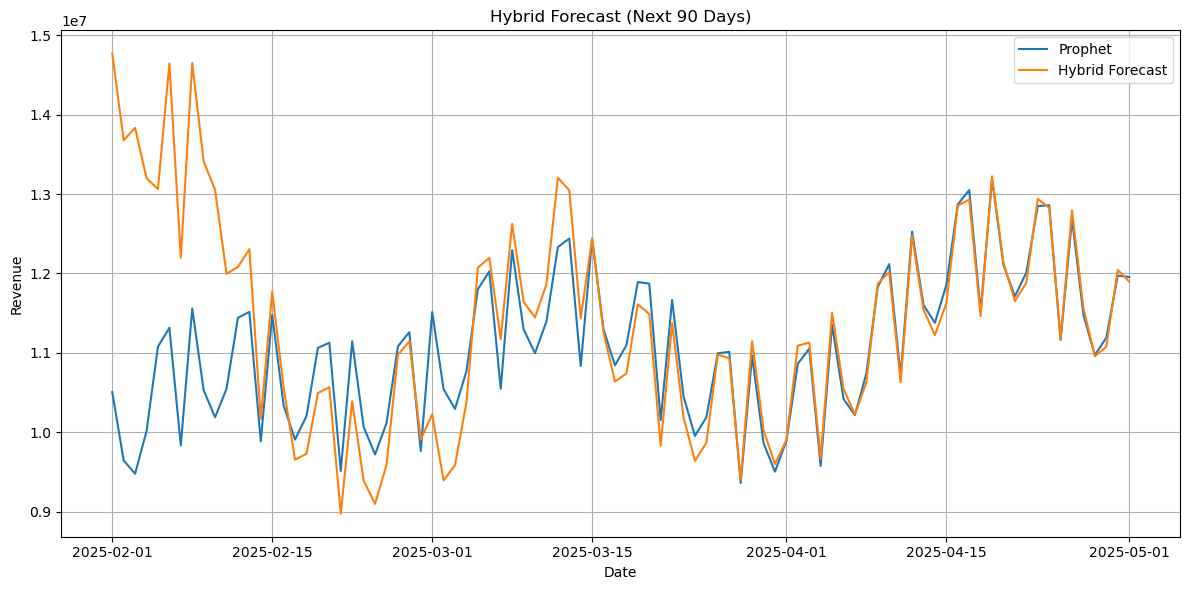

Evaluation on last 90 days:
MAE: 4215182.56
RMSE: 5157481.49
MAPE: 103.05%


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Load and preprocess data ===
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding='latin1')
df["Creation Date"] = pd.to_datetime(df["Creation Date"], dayfirst=True)
df = df[df["Revenue"] > 0]
df = df.groupby("Creation Date")["Revenue"].sum().reset_index()
df.columns = ['ds', 'y']

# === Add Holidays (Optional) ===
holidays = pd.DataFrame({
    'holiday': 'year_end',
    'ds': pd.to_datetime(['2024-12-24', '2024-12-31', '2025-01-01']),
    'lower_window': 0,
    'upper_window': 2,
})

# === Fit Prophet Model ===
prophet_model = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=True)
prophet_model.fit(df)

# === Forecast with Prophet and compute residuals ===
forecast = prophet_model.predict(df[['ds']])
df['yhat'] = forecast['yhat']
df['residual'] = df['y'] - df['yhat']

# === Scale residuals ===
scaler = StandardScaler()
df["residual_scaled"] = scaler.fit_transform(df["residual"].fillna(0).values.reshape(-1, 1)).flatten()

# === Define Dataset ===
class RevenueDataset(Dataset):
    def __init__(self, series, input_len=30, pred_len=7):
        self.X, self.y = [], []
        for i in range(len(series) - input_len - pred_len):
            self.X.append(series[i:i+input_len])
            self.y.append(series[i+input_len:i+input_len+pred_len])
        self.X = torch.tensor(self.X, dtype=torch.float32).unsqueeze(-1)
        self.y = torch.tensor(self.y, dtype=torch.float32)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

# === Split into Train/Test ===
residual_series = df["residual_scaled"].values
input_len = 30
pred_len = 7
test_days = 90

cutoff = len(residual_series) - test_days
train_series = residual_series[:cutoff]
test_series = residual_series  # use full series so test inputs include past

train_dataset = RevenueDataset(train_series, input_len=input_len, pred_len=pred_len)
test_dataset = RevenueDataset(test_series, input_len=input_len, pred_len=pred_len)
test_dataset = torch.utils.data.Subset(test_dataset, list(range(len(test_dataset) - test_days // pred_len, len(test_dataset))))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=32)

# === Define LSTM model ===
class LSTMForecast(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=2, output_len=7):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_len)
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.linear(out[:, -1, :])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMForecast().to(device)

# === Train LSTM ===
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

for epoch in range(30):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss {total_loss/len(train_loader):.4f}")

# === Forecast next 90 days with Prophet ===
future = prophet_model.make_future_dataframe(periods=90)
forecast_future = prophet_model.predict(future)
yhat_future = forecast_future[['ds', 'yhat']].tail(90).yhat.values
forecast_dates = forecast_future[['ds']].tail(90).ds.values

# === Predict LSTM residuals for next 90 days ===
input_seq = df["residual_scaled"].values[-30:].tolist()
pred_residual_all = []

model.eval()
with torch.no_grad():
    for _ in range(13):  # 13*7 = 91
        input_tensor = torch.tensor(input_seq[-30:], dtype=torch.float32).unsqueeze(0).unsqueeze(-1).to(device)
        pred = model(input_tensor).cpu().numpy().flatten()
        pred_residual_all.extend(pred)
        input_seq.extend(pred)

pred_residual_all = pred_residual_all[:90]
pred_residual_all = scaler.inverse_transform(np.array(pred_residual_all).reshape(-1, 1)).flatten()

# === Final Hybrid Forecast ===
final_forecast = yhat_future + pred_residual_all
hybrid_df = pd.DataFrame({
    'ds': forecast_dates,
    'Prophet Forecast': yhat_future,
    'LSTM Residual Forecast': pred_residual_all,
    'Final Hybrid Forecast': final_forecast
})

# === Plot Forecast ===
plt.figure(figsize=(12, 6))
plt.plot(hybrid_df['ds'], hybrid_df['Prophet Forecast'], label='Prophet')
plt.plot(hybrid_df['ds'], hybrid_df['Final Hybrid Forecast'], label='Hybrid Forecast')
plt.legend()
plt.title("Hybrid Forecast (Next 90 Days)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Evaluation on Last 90 Days ===
actuals = df['y'].values[-90:]
prophet_pred = df['yhat'].values[-90:]
residuals = df['residual'].values[-90:]

# Reconstruct scaled input for eval
input_seq = df["residual_scaled"].values[-(30 + 90):].tolist()
pred_residual_eval = []

with torch.no_grad():
    for i in range(0, 90, 7):
        input_tensor = torch.tensor(input_seq[i:i+30], dtype=torch.float32).unsqueeze(0).unsqueeze(-1).to(device)
        pred = model(input_tensor).cpu().numpy().flatten()
        pred_residual_eval.extend(pred)

pred_residual_eval = pred_residual_eval[:90]
pred_residual_eval = scaler.inverse_transform(np.array(pred_residual_eval).reshape(-1, 1)).flatten()
hybrid_eval = prophet_pred + pred_residual_eval

mae = mean_absolute_error(actuals, hybrid_eval)
rmse = np.sqrt(mean_squared_error(actuals, hybrid_eval))
mape = np.mean(np.abs((actuals - hybrid_eval) / actuals)) * 100

print(f"Evaluation on last 90 days:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


14:17:17 - cmdstanpy - INFO - Chain [1] start processing
14:17:17 - cmdstanpy - INFO - Chain [1] done processing


Epoch 1: Loss 1.0981
Epoch 2: Loss 1.1046
Epoch 3: Loss 1.1077
Epoch 4: Loss 1.1085
Epoch 5: Loss 1.0937
Epoch 6: Loss 1.0798
Epoch 7: Loss 1.0954
Epoch 8: Loss 1.0509
Epoch 9: Loss 1.0300
Epoch 10: Loss 1.0102
Epoch 11: Loss 1.0231
Epoch 12: Loss 1.0067
Epoch 13: Loss 0.9912
Epoch 14: Loss 1.0053
Epoch 15: Loss 1.0101
Epoch 16: Loss 1.0320
Epoch 17: Loss 1.0196
Epoch 18: Loss 1.0296
Epoch 19: Loss 1.0367
Epoch 20: Loss 1.0275
Epoch 21: Loss 1.0573
Epoch 22: Loss 0.9760
Epoch 23: Loss 1.0245
Epoch 24: Loss 0.9876
Epoch 25: Loss 1.0019
Epoch 26: Loss 1.0007
Epoch 27: Loss 0.9852
Epoch 28: Loss 1.0580
Epoch 29: Loss 0.9734
Epoch 30: Loss 0.9848


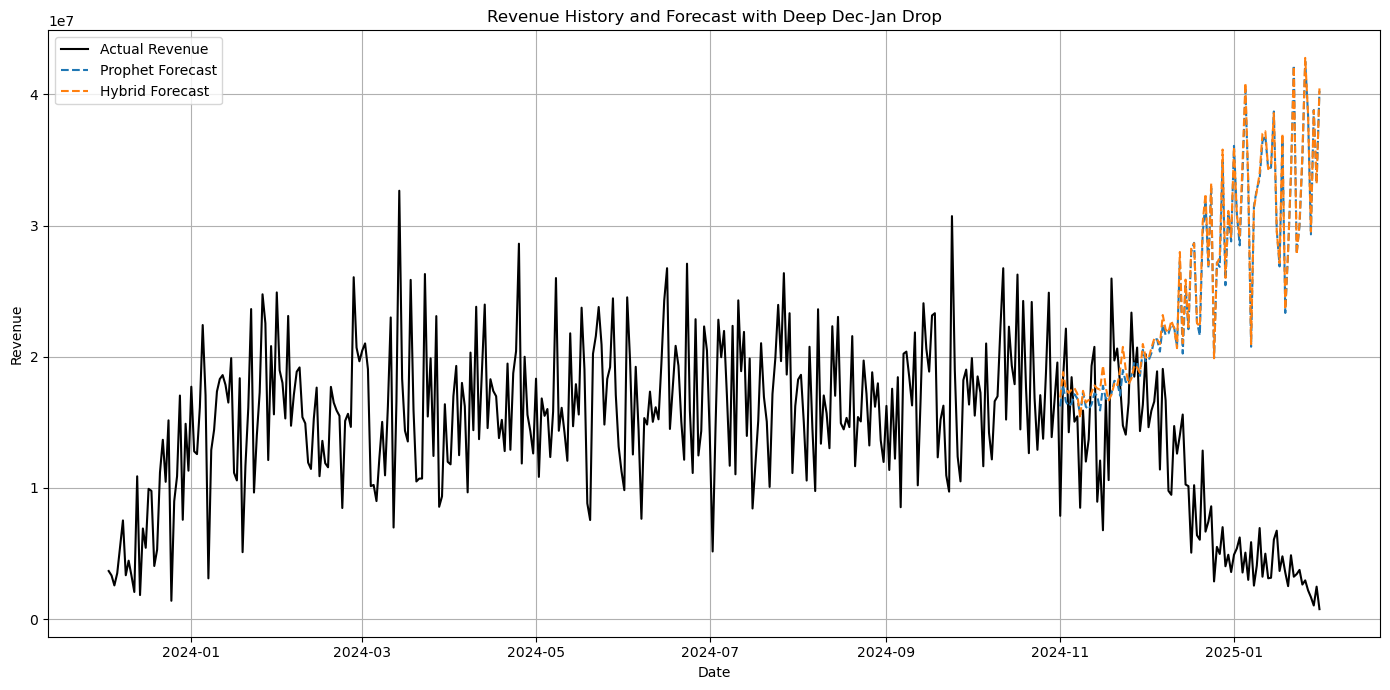


Evaluation on Test Set:
MAE: 16251498.73
RMSE: 20304067.28
MAPE: 447.33%


In [11]:
# Prophet + LSTM hybrid model with strong December-January drop modeling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# === Load and preprocess data ===
df = pd.read_csv('/home/shadowfiend/Documents/USTH/Year_3/Internship/DeffendThesis/Defend-Thesis/Data/Data_UF_cleaned.csv', encoding='latin1')
df["Creation Date"] = pd.to_datetime(df["Creation Date"], dayfirst=True)
df = df[df["Revenue"] > 0]
df = df.groupby("Creation Date")["Revenue"].sum().reset_index()
df.columns = ['ds', 'y']

# === Create strong holiday drop from Dec 10 to Feb 2 each year ===
drop_days = []
for year in range(2020, 2026):
    drop_days.append({
        'holiday': 'dec_jan_crash',
        'ds': pd.to_datetime(f'{year}-12-10'),
        'lower_window': 0,
        'upper_window': 60  # Dec 10 – Feb 2
    })
drop_holidays = pd.DataFrame(drop_days)

# === Add time features for LSTM ===
df['dayofyear'] = df['ds'].dt.dayofyear / 365.0
df['month'] = df['ds'].dt.month / 12.0
df['is_jan_drop'] = (((df['ds'].dt.month == 12) & (df['ds'].dt.day >= 10)) | (df['ds'].dt.month == 1)).astype(int)

# === Split into train and test ===
split_date = pd.to_datetime("2024-11-01")
df_train = df[df['ds'] < split_date].copy()
df_test = df[df['ds'] >= split_date].copy()

# === Prophet model ===
df_train['cap'] = 4e7
prophet_model = Prophet(
    growth='linear',  # use capped linear growth
    yearly_seasonality=True,
    weekly_seasonality=True,
    holidays=drop_holidays,
    holidays_prior_scale=80
)
prophet_model.fit(df_train[['ds', 'y', 'cap']])

# === Forecast and residuals ===
forecast_train = prophet_model.predict(df_train[['ds', 'cap']])
df_train['yhat'] = forecast_train['yhat']
df_train['residual'] = df_train['y'] - df_train['yhat']
scaler = StandardScaler()
df_train['residual_scaled'] = scaler.fit_transform(df_train['residual'].values.reshape(-1, 1)).flatten()

# === Dataset ===
class RevenueDataset(Dataset):
    def __init__(self, df, input_len=30, pred_len=7):
        series = df["residual_scaled"].values
        features = df[['dayofyear', 'month', 'is_jan_drop']].astype(float).values
        self.X, self.y = [], []
        for i in range(len(series) - input_len - pred_len):
            x_seq = np.hstack([
                series[i:i+input_len].reshape(-1, 1),
                features[i:i+input_len]
            ])
            self.X.append(x_seq)
            self.y.append(series[i+input_len:i+input_len+pred_len])
        self.X = torch.tensor(self.X, dtype=torch.float32)
        self.y = torch.tensor(self.y, dtype=torch.float32)
    def __len__(self): return len(self.X)
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

train_dataset = RevenueDataset(df_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# === LSTM model ===
class LSTMForecast(nn.Module):
    def __init__(self, input_size=4, hidden_size=64, num_layers=2, output_len=7):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, output_len)
    def forward(self, x):
        out, _ = self.lstm(x)
        return self.linear(out[:, -1, :])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMForecast().to(device)

# === Train LSTM ===
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
for epoch in range(30):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        pred = model(X_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss {total_loss/len(train_loader):.4f}")

# === Prophet forecast ===
df_test['cap'] = 4e7
forecast_test = prophet_model.predict(df_test[['ds', 'cap']])
yhat_test = forecast_test['yhat'].values
forecast_dates = forecast_test['ds'].values

# === LSTM forecast ===
last_30 = df_train.tail(30).copy()
input_seq = np.hstack([
    last_30["residual_scaled"].values.reshape(-1, 1),
    last_30[["dayofyear", "month", "is_jan_drop"]].astype(float).values
]).tolist()

pred_residual_all = []
model.eval()
with torch.no_grad():
    steps = (len(df_test) // 7) + 1
    for _ in range(steps):
        input_tensor = torch.tensor([input_seq[-30:]], dtype=torch.float32).to(device)
        pred = model(input_tensor).cpu().numpy().flatten()
        pred_residual_all.extend(pred)
        for j in range(7):
            if len(input_seq) >= len(df_test) + 30:
                break
            idx = len(input_seq) - 30 + j
            if idx >= len(df_test): break
            row = df_test.iloc[idx]
            input_seq.append([0.0, row['dayofyear'], row['month'], row['is_jan_drop']])

pred_residual_all = pred_residual_all[:len(df_test)]
pred_residual_all = scaler.inverse_transform(np.array(pred_residual_all).reshape(-1, 1)).flatten()

# === Final hybrid forecast ===
final_forecast = yhat_test + pred_residual_all
hybrid_df = pd.DataFrame({
    'ds': forecast_dates,
    'Prophet Forecast': yhat_test,
    'LSTM Residual Forecast': pred_residual_all,
    'Final Hybrid Forecast': final_forecast,
    'Actual': df_test['y'].values
})

# === Plot ===
plt.figure(figsize=(14, 7))
plt.plot(df['ds'], df['y'], label='Actual Revenue', color='black')
plt.plot(hybrid_df['ds'], hybrid_df['Prophet Forecast'], label='Prophet Forecast', linestyle='--')
plt.plot(hybrid_df['ds'], hybrid_df['Final Hybrid Forecast'], label='Hybrid Forecast', linestyle='--')
plt.legend()
plt.title("Revenue History and Forecast with Deep Dec-Jan Drop")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

# === Evaluation ===
actuals = df_test['y'].values
mae = mean_absolute_error(actuals, final_forecast)
rmse = np.sqrt(mean_squared_error(actuals, final_forecast))
mape = np.mean(np.abs((actuals - final_forecast) / actuals)) * 100

print(f"\nEvaluation on Test Set:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")
